# <center><u> CP322: Assignment 3 – Winter 2023 </u> </center>
# <center><u>  Due on  March 09, 2023 (Before 11:59 PM) </u> </center>
 
 This is a **group (of 2)** assignment, and we will practice the concepts to build classification and regression models etc. There are two parts to this assingment.
 
 For this assignment, you must use Python language. You will use this jupyter notebook to write your code without errors. If your code will not run, then you will score zero. Therefore, ensure you have removed all syntax errors from your code and not changing the variable names. Gradescope platform would be used to upload the assignments for grading and autograded question's feedback will be visible to you. The link to the Gradescope assignment is available on Myls course page. 
 
 For submission, drag and drop your code file(s) into Gradescope and add your partner's name. Make sure that your file name should be as suggested in the assignment, using a different name may score zero.
 
 - Please note that the submitted code will be checked for plagiarism. By submitting this zip file, you would confirm that you have not received unauthorized assistance in preparing the assignment. You also confirm that you are aware of course policies for submitted work. 
 
 - Marks will be deducted from any questions where these requirements are not met.
 
 - Multiple attempts will be allowed, and only your last submission before the deadline will be graded. Instructor reserves the right to take off points for not following the directions.
 
<b>Warning:</b> Follow the assignment instructions to the letter in terms of the variable names and function names, as this assignment will be auto-graded except few written type questions. 

**Important Points**:

- For each question in the assignment, please write down your answer in the answer cell(s) right below the question. 
- It is helpful to have extra cells breaking down the process towards reaching your final answer. If you happen to create new cells below your answer to run codes, **NEVER** add cells between a question cell and the answer cell below it. It will cause errors when autograder run.
- Finally, unless it is stated otherwise, try to avoid using python for loops or list comprehensions.  The majority of this part of assignment can be done using builtin commands in Pandas, numpy, searborn, matplotlib, and sklearn functions.  
- **Partners.** You may work with one other partner; **Only one person is required to submit to the assignment. On Gradescope, the person who submits *must* also designate their partner so that both of you receive credit.** Once you submit, click into your submission, and there will be an option to Add Group Member in the top right corner. Make sure to **re-add your partner every time you make a new submission**, as Gradescope does not save partner information.

- **Rules.** Don't share your code with anybody but your partner. You are welcome to discuss questions with other students, but don't share the answers. The experience of solving the problems in this project will prepare you for exams (and life). If someone asks you for the answer, resist! Instead, you can demonstrate how you would solve a similar problem.

- **Tests.** The tests that are given are **not comprehensive** and passing the tests for a question **does not** mean that you answered the question correctly. However, more tests will be applied to verify the correctness of your submission in order to assign your final score, so be careful and check your work! You might want to create your own checks along the way to see if your answers make sense. Additionally, before you submit, make sure that none of your cells take a very long time to run (several minutes). Always it is good to re-run your assignment cells before submission. 

- **Free Response/written Questions.** Make sure that you put the answers to the written questions in the indicated cell we provide. **Every free response question should include an explanation** that adequately answers the question. The written questions will be manually graded on Gradescope.

**Advice.** Develop your answers incrementally. To perform a complicated task, break it up into steps, perform each step on a different line, give a new name to each result, and check that each intermediate result is what you expect. You can add any additional names or functions you want to the provided cells. Make sure that you are using distinct and meaningful variable names throughout the notebook. Along that line, **DO NOT** reuse the variable names that we use when we grade your answers. 

To get started, load the required packages. Make sure to also run the first cell of this notebook to load `otter`.

In [2]:
#pip install otter-grader

# Part 1: Handmade Classifier

 In this part, you will fit a classification model that guesses whether a movie is a comedy or a thriller by using only the number of times chosen words appear in the movie's screenplay. you will fit a class of classification algorithm to make predictions. 


In [152]:
# Run this cell to suppress all FutureWarnings
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# for data manipulation
import pandas as pd, numpy as np, random

#for graphs
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#models to run
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn import neighbors
from sklearn import tree

#train_test_split
from sklearn.model_selection import train_test_split,StratifiedShuffleSplit, GridSearchCV

#for cycle
from itertools import cycle

#metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, r2_score, accuracy_score, roc_auc_score
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

RANDOM_STATE = 42
random.seed(RANDOM_STATE)

import otter
grader = otter.Notebook()

### Dataset Loading

Here, we are exploring movie screenplays. We'll be trying to predict each movie's genre from the text of its screenplay. In particular, we have compiled a list of 5,000 words that occur in conversations between movie characters. For each movie, our dataset tells us the frequency with which each of these words occurs in certain conversations in its screenplay. All words have been converted to lowercase.

Run the cell below to read the `movies` table. **It may take up to a minute to load.**

In [153]:
movies = pd.read_csv('https://raw.githubusercontent.com/sukhjitsehra/datasets/master/CP322/movies.csv')
movies

,Title,Year,Rating,Genre,# Words,she,decid,talk,wit,razor,...,eight,morgu,comin,style,cadet,uh,uhuh,earn,tini,volunt
0,10 things i hate about you,1999,6.9,comedy,5341,0.006167,0.000597,0.001591,0.000199,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000597,0.0,0.000000,0.0,0.0
1,sister act,1992,5.9,comedy,7401,0.009293,0.000000,0.001971,0.000563,0.0,...,0.000000,0.000000,0.000000,0.000141,0.0,0.000000,0.0,0.000000,0.0,0.0
2,the boondock saints,1999,7.8,thriller,5705,0.002246,0.000561,0.002433,0.000374,0.0,...,0.000749,0.000000,0.000374,0.000000,0.0,0.001310,0.0,0.000187,0.0,0.0
3,mystery men,1999,5.9,comedy,3144,0.003308,0.000000,0.001985,0.000000,0.0,...,0.000331,0.000000,0.000000,0.000662,0.0,0.000662,0.0,0.000000,0.0,0.0
4,blade,1998,7.0,thriller,2886,0.001098,0.000000,0.001098,0.000000,0.0,...,0.000000,0.000366,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,storytelling,2001,6.7,comedy,3337,0.000947,0.000000,0.002840,0.000000,0.0,...,0.000631,0.000000,0.000000,0.000000,0.0,0.001578,0.0,0.000000,0.0,0.0
329,halloween h20: 20 years later,1998,5.4,thriller,1808,0.003497,0.000000,0.001748,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0
330,gone in sixty seconds,2000,6.0,thriller,5644,0.003217,0.000000,0.000757,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000189,0.0,0.000189,0.0,0.000000,0.0,0.0
331,the butterfly effect,2004,7.8,thriller,4950,0.000635,0.000000,0.001058,0.000000,0.0,...,0.000212,0.000000,0.000000,0.000000,0.0,0.000635,0.0,0.000000,0.0,0.0


Here is one row of the table and some of the frequencies of words that were said in the movie.

In [154]:
movies.iloc[movies.index[movies["Title"]=="runaway bride"],[0, 1, 2, 3, 4, 14, 49, 1042, 4004]]

,Title,Year,Rating,Genre,# Words,breez,england,it,bravo
64,runaway bride,1999,5.2,comedy,4895,0.0,0.0,0.023409,0.0


The above cell prints a few columns of the row for the comedy movie *Runaway Bride*.  The movie contains 4895 words. The word "it" appears 115 times, as it makes up  $\frac{115}{4895} \approx 0.0234092$ of the words in the movie. The word "england" doesn't appear at all.

Additional context: This numerical representation of a body of text, one that describes only the frequencies of individual words, is called a bag-of-words representation. This is a model that is often used in [NLP](https://en.wikipedia.org/wiki/Natural_language_processing). A lot of information is discarded in this representation: the order of the words, the context of each word, who said what, the cast of characters and actors, etc. However, a bag-of-words representation is often used for machine learning applications as a reasonable starting point, because a great deal of information is also retained and expressed in a convenient and compact format. 

Now, we will investigate whether this representation is sufficient to build an accurate genre classifier.

All movie titles are unique. The `row_for_title` function provides fast access to the one row for each title. 

*Note: All movies in our dataset have their titles lower-cased.* 

In [155]:
def row_for_title(title):
    # Find the row where the column "Title" matches the input title
    row = movies.loc[movies["Title"] == title]

    # Return the index of the row
    return movies.iloc[row.index[0],:]
row_for_title('toy story')

Title      toy story
Year            1995
Rating           8.2
Genre         comedy
# Words         3016
             ...    
uh          0.002788
uhuh             0.0
earn             0.0
tini             0.0
volunt           0.0
Name: 98, Length: 5005, dtype: object

For example, the fastest way to find the frequency of "fun" in the movie *Toy Story* is to access the `'fun'` item from its row. Check the original table to see if this worked for you!

In [156]:
row_for_title('toy story')['fun']

0.0003485535029627

**Question 1.0**

Set `expected_row_sum` to the number that you __expect__ will result from summing all proportions in each row, excluding the first five columns. Think about what any one row adds up to.

<!--
BEGIN QUESTION
name: q1_0
points:
 - 0
 - 1
-->

In [157]:
# Set row_sum to a number that's the (approximate) sum of each row of word proportions.
expected_row_sum = movies.iloc[:, 5:].sum(axis=1).mean()

In [158]:
grader.check("q1_0")

q1_0 results: All test cases passed!

This dataset was extracted from [a dataset from Cornell University](http://www.cs.cornell.edu/~cristian/Cornell_Movie-Dialogs_Corpus.html). After transforming the dataset (e.g., converting the words to lowercase, removing the naughty words, and converting the counts to frequencies), we created this new dataset containing the frequency of 5000 common words in each movie.

In [159]:
print('Words with frequencies:', len(movies.axes[1]) - 5) # except first 5
print('Movies with genres:', len(movies.axes[0]))

Words with frequencies: 5000
Movies with genres: 333


#### 1.1. Word Stemming
The columns other than "Title", "Year", "Rating", "Genre", and "# Words" in the `movies` table are all words that appear in some of the movies in our dataset.  These words have been *stemmed*, or abbreviated heuristically, in an attempt to make different [inflected](https://en.wikipedia.org/wiki/Inflection) forms of the same base word into the same string.  For example, the column "manag" is the sum of proportions of the words "manage", "manager", "managed", and "managerial" (and perhaps others) in each movie. This is a common technique used in machine learning and natural language processing.

Stemming makes it a little tricky to search for the words you want to use, so we have provided another table called `vocab_table` that will let you see examples of unstemmed versions of each stemmed word. Run the code below to load it.

**Note:** You should use `vocab_table` for the rest of Section 1.1, not `vocab_mapping`. 

In [160]:
# Just run this cell.
vocab_mapping = pd.read_csv('https://raw.githubusercontent.com/sukhjitsehra/datasets/master/CP322/stem.csv')
stemmed = np.take(movies.columns, np.arange(3, len(movies.columns)))
vocab_table = pd.merge(pd.DataFrame({'Stem': stemmed}), vocab_mapping, on='Stem')
vocab_table.iloc[1100:1110]

,Stem,Word
1100,brief,briefed
1101,brief,briefs
1102,brief,brief
1103,brief,briefing
1104,creativ,creativity
1105,creativ,creative
1106,moscow,moscow
1107,challeng,challenged
1108,challeng,challenges
1109,challeng,challenger


**Question 1.1.1**

Using `vocab_table`, find the stemmed version of the word "elements" and assign the value to `stemmed_message`.

<!--
BEGIN QUESTION
name: q1_1_1
points:
 - 0
 - 0
 - 2
-->

In [161]:
stemmed_message = vocab_table.loc[vocab_table['Word'] == 'elements'].iloc[0]['Stem']
stemmed_message

'element'

In [162]:
grader.check("q1_1_1")

q1_1_1 results: All test cases passed!

**Question 1.1.2**

What stem in the `vocab_table` dataset has the most words that are shortened to it? Assign `most_stem` to that stem. 

<!--
BEGIN QUESTION
name: q1_1_2
points:
 - 0
 - 1
 - 1
-->

In [163]:
most_stem = vocab_table['Stem'].value_counts().idxmax()
most_stem

'gener'

In [164]:
grader.check("q1_1_2")

q1_1_2 results: All test cases passed!

**Question 1.1.3**

What is the longest word in the dataset whose stem wasn't shortened? Assign that to `longest_uncut`. Break ties alphabetically from Z to A (so if your options are "cat" or "bat", you should pick "cat"). Note that when sorting letters, the letter `a` is smaller than the letter `z`.

*Hint:* `vocab_table` has 2 columns: one for stems and one for the unstemmed (normal) word. Find the longest word that wasn't cut at all (same length as stem).

<!--
BEGIN QUESTION
name: q1_1_3
points:
 - 1
 - 3
-->

In [165]:
# Create a new DataFrame with two new columns: "Word len" and "Stem len"
vocab_table['Word len'] = vocab_table['Word'].apply(len)
vocab_table['Stem len'] = vocab_table['Stem'].apply(len)

# Create a new column "len dif" that shows the difference between "Word len" and "Stem len"
vocab_table['len dif'] = vocab_table['Word len'] - vocab_table['Stem len']

# Filter the DataFrame to only include rows where "len dif" is 0
tbl_with_diff = vocab_table[vocab_table['len dif'] == 0]

# Sort the filtered DataFrame by "Word" in descending order and "Word len" in descending order
tbl_with_diff = tbl_with_diff.sort_values(by=['Word', 'Word len'], ascending=[False, False])

# Extract the first value in the "Word" column
longest_uncut = tbl_with_diff.iloc[0]['Word']
longest_uncut

'zoo'

In [166]:
grader.check("q1_1_3")

q1_1_3 results: All test cases passed!

#### 1.2. Exploratory Data Analysis: Linear Regression

Let's explore our dataset before trying to build a classifier. To start, we’ll use the associated proportions to investigate the relationship between different words.

The first association we'll investigate is the association between the proportion of words that are "outer" and the proportion of words that are "space". 

As usual, we'll investigate our data visually before performing any numerical analysis.

Run the cell below to plot a scatter diagram of "space" proportions vs "outer" proportions and to create the `outer_space` dataframe. Each point on the scatter plot represents one movie.

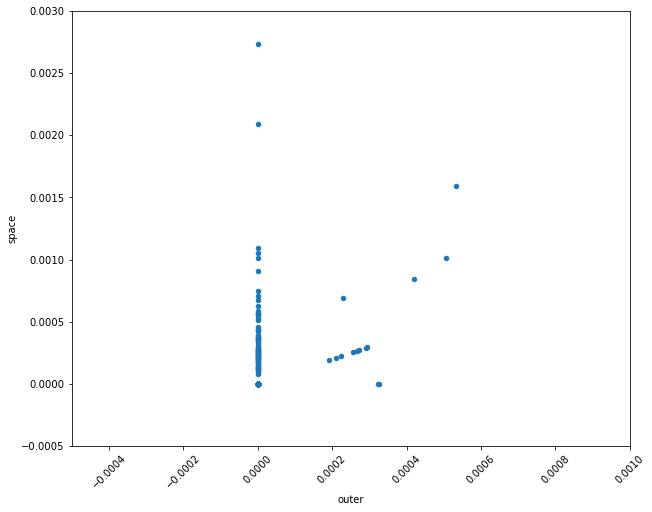

In [167]:
# Select the "outer" and "space" columns from the DataFrame
outer_space = movies[['outer', 'space']]

# Create a scatter plot of "outer" proportions vs "space" proportions
outer_space.plot.scatter(x='outer', y='space', figsize=(10, 8))
plt.xlim(-0.0005, 0.001)
plt.ylim(-0.0005, 0.003)
# Rotate the x-axis labels by 45 degrees
plt.xticks(rotation=45)
plt.draw()

**Question 1.2.1**

Looking at that chart it is difficult to see if there is an association. Calculate the correlation coefficient for the potential linear association between proportion of words that are "outer" and the proportion of words that are "space" for every movie in the dataset, and assign it to `outer_space_cor`. 

<!--
BEGIN QUESTION
name: q1_2_1
points:
 - 0
 - 2
-->

In [168]:
# These two arrays should make your code cleaner!
outer = movies["outer"]
space = movies["space"]

# code to find (X_i - mean(X))/std(X)
outer_su = (outer - np.mean(outer)) / np.std(outer)
space_su = (space - np.mean(space)) / np.std(space)

# find correlation
outer_space_cor = np.mean(outer_su * space_su)
outer_space_cor

0.31942607876895845

In [169]:
grader.check("q1_2_1")

q1_2_1 results: All test cases passed!

<!-- BEGIN QUESTION -->

**Question 1.2.2 (Manually Graded)**

Choose two *different* words in the movies dataset with a magnitude (absolute value) of correlation higher than 0.2 and plot a scatter plot with a line of best fit for them. Please do not pick "outer" and "space" or "san" and "francisco". The code to plot the scatter plot and line of best fit is given for you, you just need to calculate the correct values to `cor`, `slope` and `intercept`. 

*Hint:* It's easier to think of words with a positive correlation, i.e. words that are often mentioned together*. Try to think of common phrases or idioms.

<!--
BEGIN QUESTION
name: q1_2_2
manual: true
-->

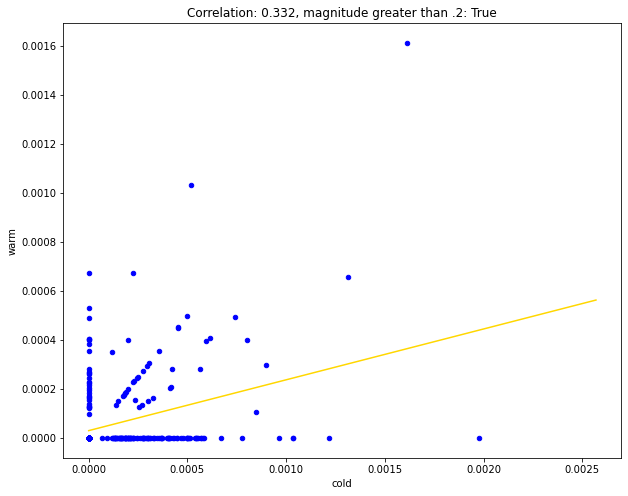

In [170]:
word_x = "cold" 
word_y = "warm"

# These arrays should make your code cleaner!
arr_x = movies["cold"]
arr_y = movies["warm"]

# code to find (X_i - mean(X))/std(X)
x_su = (movies['cold'] - movies['cold'].mean()) / movies['cold'].std()
y_su = (movies['warm'] - movies['warm'].mean()) / movies['warm'].std()

cor = x_su.corr(y_su)

slope = cor * (arr_y.std() / arr_x.std())
intercept = arr_y.mean() - slope * arr_x.mean()
# DON'T CHANGE THESE LINES OF CODE
# Create a scatter plot of the data
ax = movies.plot.scatter(x=word_x, y=word_y, figsize=(10, 8), color='blue')

# Add the regression line to the plot
max_x = arr_x.max()
ax.plot([0, max_x * 1.3], [intercept, intercept + slope * (max_x*1.3)], color='gold', label='Regression Line')

# Add the title to the plot
plt.title(f"Correlation: {cor:.3f}, magnitude greater than .2: {abs(cor) >= 0.2}")

# Show the plot
plt.draw()

<!-- END QUESTION -->

**Question 1.2.3**


Imagine that you picked the words "san" and "francisco" as the two words that you would expect to be correlated because they compose the city name San Francisco. Assign `san_francisco` to either the number '1' or  '2' according to which statement is true regarding the correlation between "san" and "francisco." 

1. "san" can also preceed other city names like San Diego and San Jose. This might lead to "san" appearing in movies without "francisco," and would reduce the correlation between "san" and "francisco."
2. "san" can also preceed other city names like San Diego and San Jose. The fact that "san" could appear more often in front of different cities and without "francisco" would increase the correlation between "san" and "francisco." 

<!--
BEGIN QUESTION
name: q1_2_3
points:
 - 0
 - 1
-->

In [171]:
san_francisco = 1

In [172]:
grader.check("q1_2_3")

q1_2_3 results: All test cases passed!

#### 1.3. Splitting the dataset

Now, we're going to use our `movies` dataset for two purposes.

1. First, we want to *train* movie genre classifiers.
2. Second, we want to *test* the performance of our classifiers. 

Hence, we need two different datasets: *training* and *test*. 

The purpose of a classifier is to classify unseen data that is similar to the training data. The test dataset will help us determine the accuracy of our predictions by comparing the actual genres of the movies with the genres that our classifier predicts. Therefore, we must ensure that there are no movies that appear in both sets. We do so by splitting the dataset randomly. The dataset has already been permuted randomly, so it's easy to split.  We just take the first 85% of the dataset for training and the rest for test. 

Run the code below (without changing it) to separate the datasets into two tables.

In [173]:
movies.shape[0]

333

In [174]:
training_proportion = 17/20

num_movies = movies.shape[0]
num_train = int(num_movies * training_proportion)
num_test = num_movies - num_train

train_movies = movies.take(np.arange(num_train))
test_movies = movies.take(np.arange(num_train, num_movies))

print("Training: ",   train_movies.shape[0], ";",
      "Test: ",       test_movies.shape[0])


Training:  283 ; Test:  50


<!-- BEGIN QUESTION -->

**Question 1.3.1 (Manually Graded)**

Draw a horizontal bar chart with two bars that show the proportion of Comedy movies in each dataset (`train_movies` and `test_movies`). The two bars should be labeled "Training" and "Test". Complete the function `comedy_proportion` first; it should help you create the bar chart. 

<!--
BEGIN QUESTION
name: q1_3_1
manual: true
-->

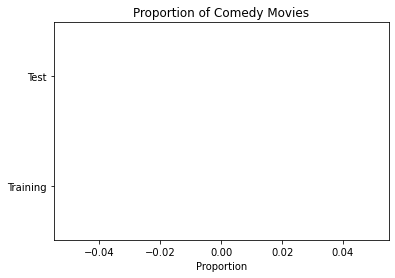

In [175]:
import matplotlib.pyplot as plt
def comedy_proportion(table):
    # Return the proportion of movies in a table that have the comedy genre.
    comedy_count = table.where(table["Genre"] == "Comedy").dropna().shape[0]
    return comedy_count / table.shape[0]

train_comedy_prop = comedy_proportion(train_movies)
test_comedy_prop = comedy_proportion(test_movies)
# The staff solution took multiple lines.  Start by creating a table.
# If you get stuck, think about what sort of table you need for barh to work
plt.barh(["Training", "Test"], [train_comedy_prop, test_comedy_prop])
plt.title("Proportion of Comedy Movies")
plt.xlabel("Proportion")
plt.show()

<!-- END QUESTION -->



### 2 K-Nearest Neighbors

We are going to `simulate` the steps that `K-Nearest Neighbors (k-NN)` algorithm will use for classification, i.e.,  Given some numerical *attributes* (also called *features*) of an unseen example, it decides which category that example belongs to based on its similarity to previously seen examples. Predicting the category of an example is called *labeling*, and the predicted category is also called a *label*.

An attribute (feature) we have about each movie is *the proportion of times a particular word appears in the movie*, and the labels are two movie genres: comedy and thriller.  The algorithm requires many previously seen examples for which both the attributes and labels are known: that's the `train_movies` table.

To build understanding, we're going to visualize the algorithm instead of just describing it.

#### 2.1. Classifying a movie

In k-NN, we classify a movie by finding the `k` movies in the *training set* that are most similar according to the features we choose. We call those movies with similar features the *nearest neighbors*.  The k-NN algorithm assigns the movie to the most common category among its `k` nearest neighbors.

Let's limit ourselves to just 2 features for now, so we can plot each movie.  The features we will use are the proportions of the words "water" and "feel" in the movie.  Taking the movie *Monty Python and the Holy Grail* (in the test set), 0.000804074 of its words are "water" and 0.0010721 are "feel". This movie appears in the test set, so let's imagine that we don't yet know its genre.

First, we need to make our notion of similarity more precise.  We will say that the *distance* between two movies is the straight-line distance between them when we plot their features on a scatter diagram. 

**This distance is called the Euclidean ("yoo-KLID-ee-un") distance, whose formula is $\sqrt{(x_1 - x_2)^2 + (y_1 - y_2)^2}$.**

For example, in the movie *Clerks.* (in the training set), 0.00016293 of all the words in the movie are "water" and 0.00154786 are "feel".  Its distance from *Monty Python and the Holy Grail* on this 2-word feature set is $\sqrt{(0.000804074 - 0.000162933)^2 + (0.0010721 - 0.00154786)^2} \approx 0.000798379$.  (If we included more or different features, the distance could be different.)

A third movie, *The Godfather* (in the training set), has 0 "water" and 0.00015122 "feel". 

The function below creates a plot to display the "water" and "feel" features of a test movie and some training movies. As you can see in the result, *Monty Python and the Holy Grail* is more similar to *Clerks.* than to the *The Godfather* based on these features, which makes sense as both movies are comedy movies, while *The Godfather* is a thriller.

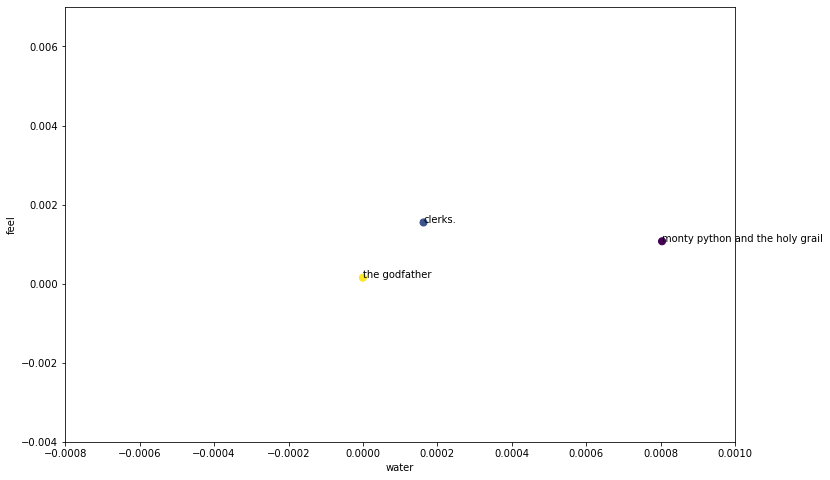

In [176]:
# Just run this cell.
def plot_with_two_features(test_movie, training_movies, x_feature, y_feature):
    """Plot a test movie and training movies using two features."""
    test_row = row_for_title(test_movie)
    distances = pd.DataFrame({
            x_feature: [test_row[x_feature]],
            y_feature: [test_row[y_feature]],
            'Color': 0,
            'Title': [test_movie]
        })

    color_map = {'unknown': 0, 'comedy': 1, 'drama': 2, 'action': 3, 'thriller': 4}
    for movie in training_movies:
        row = row_for_title(movie)
        distances = distances.append({
            x_feature: row[x_feature],
            y_feature: row[y_feature],
            'Color': color_map.get(row['Genre']),
            'Title': movie
        }, ignore_index=True)
    fig = plt.figure(figsize=(12, 8))
    plt.axis([-0.0008, 0.001, -0.004, 0.007]);
    ax = plt.scatter(distances[x_feature], distances[y_feature], c=distances['Color'], s=50)
    plt.xlabel(x_feature)
    plt.ylabel(y_feature)
    for i, title in enumerate(distances['Title']):
        ax.axes.annotate(title, (distances[x_feature][i], distances[y_feature][i]))
    plt.draw()
    
training = ["clerks.", "the godfather"] 
plot_with_two_features("monty python and the holy grail", training, "water", "feel")

**Question 2.1.1**

Compute the Euclidean distance (defined in the section above) between the two movies, *Monty Python and the Holy Grail* and *The Godfather*, using the `water` and `feel` features only.  Assign it the name `one_distance`. 

*Hint:* In the formula for Euclidean distance, think carefully about what `x` and `y` represent. Refer to the example in the text above if you are unsure.

<!--
BEGIN QUESTION
name: q2_1_1
points:
 - 0
 - 3
-->

In [177]:
python = row_for_title("monty python and the holy grail") 
godfather = row_for_title("the godfather") 

one_distance = np.sqrt((python["water"] - godfather["water"])**2 + (python["feel"] - godfather["feel"])**2)
one_distance

0.0012225209151294461

In [178]:
grader.check("q2_1_1")

q2_1_1 results: All test cases passed!

Below, we've added a third training movie, *The Silence of the Lambs*. Before, the point closest to *Monty Python and the Holy Grail* was *Clerks.*, a comedy movie. However, now the closest point is *The Silence of the Lambs*, a thriller movie.

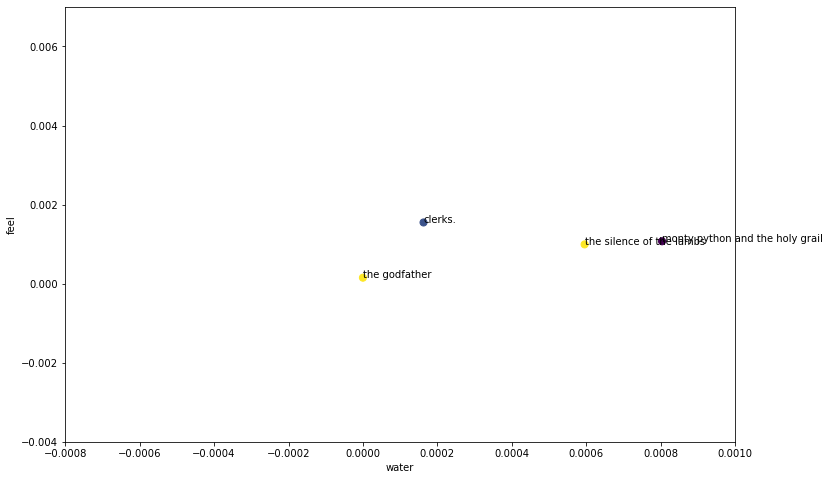

In [179]:
training = ["clerks.", "the godfather", "the silence of the lambs"] 
plot_with_two_features("monty python and the holy grail", training, "water", "feel") 

**Question 2.1.2**

Complete the function `distance_two_features` that computes the Euclidean distance between any two movies, using two features. The last two lines call your function to show that *Monty Python and the Holy Grail* is closer to *The Silence of the Lambs* than it is to *Clerks*. 

<!--
BEGIN QUESTION
name: q2_1_2
points:
 - 1
 - 2
-->

In [180]:
def distance_two_features(title0, title1, x_feature, y_feature):
    """Compute the distance between two movies with titles title0 and title1.
    
    Only the features named x_feature and y_feature are used when computing the distance.
    """
    row0 = row_for_title(title0)
    row1 = row_for_title(title1)
    distance = ((row0[x_feature] - row1[x_feature]) ** 2 + (row0[y_feature] - row1[y_feature]) ** 2) ** 0.5
    return distance

for movie in ["clerks.", "the silence of the lambs"]:
    movie_distance = distance_two_features(movie, "monty python and the holy grail", "water", "feel")
    print(movie, 'distance:\t', movie_distance)

clerks. distance:	 0.0007983810687227716
the silence of the lambs distance:	 0.00022256314855564847


In [181]:
grader.check("q2_1_2")

q2_1_2 results: All test cases passed!

**Question 2.1.3**

Define the function `distance_from_python` so that it works as described in its documentation. 

**Note:** Your solution should not use arithmetic operations directly. Instead, it should make use of existing functionality above!

<!--
BEGIN QUESTION
name: q2_1_3
points:
 - 0
 - 3
-->

In [182]:
def distance_from_python(title):
    """The distance between the given movie and "monty python and the holy grail", 
    based on the features "water" and "feel".
    
    This function takes a single argument:
      title: A string, the name of a movie.
    """
    
    return distance_two_features(title, 'monty python and the holy grail', 'water', 'feel')

# Calculate the distance between "Clerks." and "Monty Python and the Holy Grail"
distance_from_python('clerks.')

0.0007983810687227716

In [183]:
grader.check("q2_1_3")

q2_1_3 results: All test cases passed!

**Question 2.1.4**

Using the features `"water"` and `"feel"`, what are the names and genres of the 5 movies in the **training set** closest to *Monty Python and the Holy Grail*?  To answer this question, make a **dataframe** named `close_movies` containing those 5 movies with columns `"Title"`, `"Genre"`, `"water"`, and `"feel"`, as well as a column called `"distance from python"` that contains the distance from *Monty Python and the Holy Grail*.  The table should be **sorted in ascending order by `"distance from python"`**.

*Note:* Why are smaller distances from *Monty Python and the Holy Grail* more helpful in helping us classify the movie?

*Hint:* Your final dataframe should only have 5 rows. How can you get the first five rows of a dataframe?


<!--
BEGIN QUESTION
name: q2_1_4
points:
 - 1
 - 0
 - 1
 - 3
-->

In [184]:

# The staff solution took multiple lines.
movies_copy = train_movies.copy()
movies_copy["distance from python"] = movies.apply(lambda row: distance_two_features("monty python and the holy grail", row["Title"], "water", "feel"), axis=1)
close_movies = movies_copy.sort_values("distance from python").head(5)[["Title", "Genre", "water", "feel", "distance from python"]]

print(close_movies.head())

                        Title     Genre     water      feel  \
256                     alien  thriller  0.000709  0.001241   
72        tomorrow never dies  thriller  0.000889  0.000889   
225  the silence of the lambs  thriller  0.000596  0.000993   
53                 innerspace    comedy  0.000522  0.001044   
274          some like it hot    comedy  0.000529  0.000951   

     distance from python  
256              0.000194  
72               0.000202  
225              0.000223  
53               0.000283  
274              0.000301  


In [185]:
grader.check("q2_1_4")

q2_1_4 results: All test cases passed!

**Question 2.1.5**

Next, we'll clasify *Monty Python and the Holy Grail* based on the genres of the closest movies. 

To do so, define the function `most_common` so that it works as described in its documentation below. 

<!--
BEGIN QUESTION
name: q2_1_5
points:
 - 3
-->

In [186]:
def most_common(df, column):
    """The most common element in a column of a table.
    
    This function takes two arguments:
      column: The name of a column, a string.
      df: dataframe
     
    It returns the most common value in the label column of the table.
    In case of a tie, it returns any one of the most common values.    
    """

    # Count occurrences of each value in the column
    counts = df[column].value_counts()

    # Get the maximum count
    max_count = counts.max()

    # Get all values that have the maximum count
    most_common_values = counts[counts == max_count].index

    # Return any one of the most common values
    return most_common_values[0]

# Calling most_common on your table of 5 nearest neighbors classifies
# "monty python and the holy grail" as a thriller movie, 3 votes to 2. 
most_common(close_movies, 'Genre')

'thriller'

In [187]:
grader.check("q2_1_5")

q2_1_5 results: All test cases passed!

Congratulations are in order -- you've classified your first movie! However, we can see that the classifier doesn't work too well since it categorized *Monty Python and the Holy Grail* as a thriller movie (unless you count the thrilling holy hand grenade scene). Let's see if we can do better!

### 3 Add More Features

Now, we're going to extend our classifier to consider more than two features at a time.

Euclidean distance still makes sense with more than two features. For `n` different features, we compute the difference between corresponding feature values for two movies, square each of the `n`  differences, sum up the resulting numbers, and take the square root of the sum.

**Question 3.0**

Write a function called `distance` to compute the Euclidean distance between two **arrays** of **numerical** features (e.g. arrays of the proportions of times that different words appear). The function should be able to calculate the Euclidean distance between two arrays of arbitrary (but equal) length.

Next, use the function you just defined to compute the distance **between the first and second movie** in the **training set** *using all of the features*.  (Remember that the first five columns of your tables are not features.)

*Hint:* Make sure to skip the first five columns of the dataframe before you compute `distance_first_to_second`, as these columns do not contain any features (the proportions of words). 

<!--
BEGIN QUESTION
name: q3_0
points:
 - 0.5
 - 0.5
 - 0
 - 0.75
 - 0.75
 - 0.75
 - 0.75
-->

In [188]:
def distance(features_array1, features_array2):
    """The Euclidean distance between two arrays of feature values."""
    #-------- Error Check----------------
    if len(features_array1) != len(features_array2):
        raise ValueError("Arrays have incompatible lengths")

    
    #------ Eucliden Distance Calculations----------------------
    diff = features_array1 - features_array2
    squared_diff = np.square(diff)
    sum_squared_diff = np.sum(squared_diff)
    distance = np.sqrt(sum_squared_diff)
    
    return distance

#------------- Trim first 5 columns------------------------------
train_movies_counts = train_movies.iloc[:, 5:]
#print(train_movies_counts.head())


#-------------- Caluclate distance between 1st & 2nd movies in training set ------------
distance_first_to_second = distance(train_movies_counts.iloc[0], train_movies_counts.iloc[1])
distance_first_to_second

0.03335446890881317

In [189]:
grader.check("q3_0")

q3_0 results: All test cases passed!

#### 3.1. Creating your own feature set

Unfortunately, using all of the features has some downsides.  One clear downside is the lack of *computational efficiency* -- computing Euclidean distances just takes a long time when we have lots of features.  You might have noticed that in the last question!

So in this part, we're going to start with just 10-20.  We'd like to choose features that are very *discriminative*. That is, features which lead us to correctly classify as much of the test set as possible.  This process of choosing features that will make a classifier work well is sometimes called *feature selection*, or, more broadly, *feature engineering*.

In this question, we will help you get started on selecting more effective features for distinguishing comedy from thriller movies. The plot below (generated for you) shows the average number of times each word occurs in a comedy movie on the horizontal axis and the average number of times it occurs in an thriller movie on the vertical axis. 


*Note: The line graphed is the line of best fit, NOT the line y=x.*

![word_plot.png](https://github.com/sukhjitsehra/datasets/blob/master/CP322/images/word_plot.png?raw=true)

Questions 3.1.1 through 3.1.4 will ask you to interpret the plot above. For each question, select one of the following choices and assign its number to the provided name.
1. The word is common in both comedy and thriller movies 
2. The word is uncommon in comedy movies and common in thriller movies
3. The word is common in comedy movies and uncommon in thriller movies
4. The word is uncommon in both comedy and thriller movies
5. It is not possible to say from the plot 
    
**Question 3.1.1**

What properties do words in the bottom left corner of the plot have? Your answer should be a single integer from 1 to 5, corresponding to the correct statement from the choices above.

<!--
BEGIN QUESTION
name: q3_1_1
points:
 - 0
 - 1
-->

In [190]:
bottom_left = 4

In [191]:
grader.check("q3_1_1")

q3_1_1 results: All test cases passed!

**Question 3.1.2**

What properties do words in the bottom right corner have? Your answer should be a single integer from 1 to 5, corresponding to the correct statement from the choices above.

<!--
BEGIN QUESTION
name: q3_1_2
points:
 - 0
 - 1
-->

In [192]:
bottom_right = 3

In [193]:
grader.check("q3_1_2")

q3_1_2 results: All test cases passed!

**Question 3.1.3**

What properties do words in the top right corner have? Your answer should be a single integer from 1 to 5, corresponding to the correct statement from the choices above.


<!--
BEGIN QUESTION
name: q3_1_3
points:
 - 0
 - 1
-->

In [194]:
top_right = 1

In [195]:
grader.check("q3_1_3")

q3_1_3 results: All test cases passed!

**Question 3.1.4**

What properties do words in the top left corner have? Your answer should be a single integer from 1 to 5, corresponding to the correct statement from the choices above.


<!--
BEGIN QUESTION
name: q3_1_4
points:
 - 0
 - 1
-->

In [196]:
top_left = 2

In [197]:
grader.check("q3_1_4")

q3_1_4 results: All test cases passed!

**Question 3.1.5**

If we see a movie with a lot of words that are common for comedy movies but uncommon for thriller movies, what would be a reasonable guess about the genre of the movie? Assign `movie_genre` to the integer corresponding to your answer:
1. if it is a thriller movie.
2. if it is a comedy movie.

<!--
BEGIN QUESTION
name: q3_1_5
points:
 - 0
 - 1
-->

In [198]:
movie_genre_guess = 2

In [199]:
grader.check("q3_1_5")

q3_1_5 results: All test cases passed!

**Question 3.1.6**

Using the plot above, make an list of at least 10 common words that you think might let you **distinguish** between comedy and thriller movies. Make sure to choose words that are **frequent enough** that every movie contains at least one of them. Don't just choose the most frequent words though--you can do much better.

<!--
BEGIN QUESTION
name: q3_1_6
points:
 - 0
 - 0
 - 0
 - 1.5
 - 1.5
 
-->

In [200]:
# Set my_features to an list (strings that are column labels) e.g. 'i', 'the', 'to', 'a', 'it', 'and', 'that', 'of', 'your', 'what', 'in', 'me', 'is', 'do', 'thi', 'dont', 'he', 'for', 'know'

my_features = ['kill', 'oh', 'love', 'dead', 'realli', 'uh', 'mean', 'well', 'think', 'thank']

# Select the above features from both the train and test sets
train_my_features = train_movies[my_features]
test_my_features = test_movies[my_features]


In [201]:
grader.check("q3_1_6")

q3_1_6 results: All test cases passed!

This test makes sure that you have chosen words such that at least one appears in each movie. If you can't find words that satisfy this test just through intuition, try writing code to print out the titles of movies that do not contain any words from your list, then look at the words they do contain.

Next, let's classify the first movie from our test set using these features.  You can examine the movie by running the cells below. Do you think it will be classified correctly?

In [202]:
print("Movie:")
test_movies[['Title', 'Genre']].iloc[0]

Movie:


Title    ghostbusters ii
Genre             comedy
Name: 283, dtype: object

In [203]:
print("Features:")
test_my_features.iloc[0]

Features:


kill      0.000330
oh        0.003132
love      0.000824
dead      0.000165
realli    0.002638
uh        0.000165
mean      0.000989
well      0.003627
think     0.005770
thank     0.001813
Name: 283, dtype: float64

As before, we want to look for the movies in the training set that are most like our test movie.  We will calculate the Euclidean distances from the test movie (using `my_features`) to all movies in the training set.  You could do this with a `for` loop, but to make it computationally faster, we have provided a function, `fast_distances`, to do this for you.  Read its documentation to make sure you understand what it does.  (You don't need to understand the code in its body unless you want to.)

In [204]:
def fast_distances(test_row, train_df):
    assert train_df.shape[1] < 50, "Make sure you're not using all the features of the movies table."
    assert type(test_row) != pd.DataFrame, "Make sure you are passing in a row object to fast_distances."
    assert len(test_row) == train_df.shape[1], "Make sure the length of test row is the same as the number of columns in train_table."
    counts_matrix = train_df.values
    diff = np.tile(np.array(test_row), [counts_matrix.shape[0], 1]) - counts_matrix
    np.random.seed(0) # For tie breaking purposes
    distances = np.squeeze(np.asarray(np.sqrt(np.square(diff).sum(1))))
    eps = np.random.uniform(size=distances.shape)*1e-10 #Noise for tie break
    distances = distances + eps
    return distances

**Question 3.1.8**

Use the `fast_distances` function provided above to compute the distance from the first movie in your test set to all the movies in your training set, **using your set of features**. Make a new dataframe called `genre_and_distances` with one row for each movie in the training set and two columns:
* The `"Genre"` of the training movie
* The `"Distance"` from the first movie in the test set 

Ensure that `genre_and_distances` is **sorted in ascending order by distance to the first test movie**.

*Hint:* Think about how you can use the variables you defined in 3.1.6.

<!--
BEGIN QUESTION
name: q3_1_8
points:
 - 0
 - 1
 - 2
-->

In [205]:
# The staff solution took multiple lines of code.

#--------- Get genres & distance to 1st test movie ----------
genres = train_movies['Genre']
distances = fast_distances(test_my_features.iloc[0],train_my_features)
#print(distances)

#--------- Create & sort dataframe
genre_and_distances = pd.DataFrame({'Genre': genres, 'Distance': distances})
genre_and_distances = genre_and_distances.sort_values(by=["Distance"])

#print(genre_and_distances.iloc[0:4]) #show sorting
#print('Shape: ', genre_and_distances.shape[0]) #show shape 

In [206]:
grader.check("q3_1_8")

q3_1_8 results: All test cases passed!

**Question 3.1.9**

Now compute the 7-nearest neighbors classification of the first movie in the test set.  That is, decide on its genre by finding the most common genre among its 7 nearest neighbors in the training set, according to the distances you've calculated.  Then check whether your classifier chose the right genre.  (Depending on the features you chose, your classifier might not get this movie right, and that's okay.)

*Hint:* You should use the `most_common` function that was defined earlier and pass first 7 rows of data frame `genre_and_distances`.

<!--
BEGIN QUESTION
name: q3_1_9
points:
 - 1
 - 1
-->

In [207]:
# Set my_assigned_genre to the most common genre among these.
my_assigned_genre = most_common(genre_and_distances.iloc[0:6],'Genre')

# Set my_assigned_genre_was_correct to True if my_assigned_genre
# matches the actual genre of the first movie in the test set, False otherwise.
my_assigned_genre_was_correct = my_assigned_genre == test_movies.iloc[0]['Genre']

print("The assigned genre, {}, was{}correct.".format(my_assigned_genre, " " if my_assigned_genre_was_correct else " not "))

The assigned genre, comedy, was correct.


In [208]:
grader.check("q3_1_9")

q3_1_9 results: All test cases passed!

#### 3.2. A classifier function

Now we can write a single function that encapsulates the whole process of classification.

**Question 3.2.1**

Write a function called `classify`.  It should take the following four arguments:
* A row of features for a movie to classify (e.g., `test_my_features.iloc[0]`).
* A dataframe with a column for each feature (e.g., `train_my_features`).
* An array of classes (e.g. the labels "comedy" or "thriller") that has as many items as the previous table has rows, and in the same order. *Hint:* What are the labels of each row in the training set? 
* `k`, the number of neighbors to use in classification.

It should return the class label that a `k`-nearest neighbor classifier picks for the given row of features (the string `'comedy'` or the string `'thriller'`). 

<!--
BEGIN QUESTION
name: q3_2_1
points:
 - 1.5
 - 1.5
-->

In [228]:
#print(train_movies.head())
def classify(test_row, train_features, train_labels, k):
    """Return the most common class among k nearest neigbors to test_row."""
    #------- Find Distances --------------------
    distances = fast_distances(test_row, train_features)

    #--------- Create DF & sort by distances ------------
    genre_and_distances = pd.DataFrame({'Genre': genres, 'Distance': distances})
    genre_and_distances = genre_and_distances.sort_values(by=["Distance"])

    #--------- Find most common of K neighbours
    genre_estimate = most_common(genre_and_distances.iloc[0:k],'Genre')

    #print("G & D: ", genre_and_distances.head())
    #print("Genre est: ", genre_estimate)

    return genre_estimate

In [229]:
grader.check("q3_2_1")

q3_2_1 results: All test cases passed!

**Question 3.2.2**

Assign `godzilla_genre` to the genre predicted by your classifier for the movie "godzilla" in the test set, using **15 neighbors** and using your 10 features. 

*Hint:* The `row_for_title` function will not work here.

<!--
BEGIN QUESTION
name: q3_2_2
points:
 - 3
-->

In [232]:
# The staff solution first defined a row called godzilla_features.
#-------- Find 'Godzilla' and select features ------------------------------
godzilla_features = test_movies[test_movies["Title"] == "godzilla"].loc[:,my_features].iloc[0]
godzilla_features = godzilla_features[my_features]
#print(godzilla_features)
#print(train_my_features)
#print(train_movies['Genre'])

#--------- Use Classify() to identify the genre --------------------------------
godzilla_genre = classify(godzilla_features, train_my_features, train_movies['Genre'], 15)
godzilla_genre

#print(test_movies.head())

kill      0.001062
oh        0.003187
love      0.000354
dead      0.000354
realli    0.001771
uh        0.000354
mean      0.001771
well      0.003895
think     0.004603
thank     0.001062
Name: 319, dtype: float64
         kill        oh      love      dead    realli        uh      mean  \
0    0.000398  0.002188  0.000597  0.000398  0.001989  0.000597  0.001790   
1    0.000704  0.002394  0.002534  0.000563  0.002816  0.000000  0.002394   
2    0.004118  0.004305  0.000936  0.001497  0.000561  0.001310  0.001497   
3    0.002316  0.002646  0.001654  0.001323  0.003639  0.000662  0.001985   
4    0.002196  0.000366  0.000000  0.001098  0.000732  0.000000  0.000366   
..        ...       ...       ...       ...       ...       ...       ...   
278  0.000270  0.008495  0.004854  0.000000  0.006068  0.000135  0.001618   
279  0.000454  0.003331  0.002726  0.000303  0.002726  0.000909  0.003028   
280  0.001096  0.000959  0.002193  0.000685  0.003427  0.000000  0.001645   
281  0.002119 

'comedy'

In [231]:
grader.check("q3_2_2")

q3_2_2 results:
    q3_2_2 - 1 result:
        ❌ Test case failed
        Trying:
            godzilla_genre == 'thriller'
        Expecting:
            True
        **********************************************************************
        Line 1, in q3_2_2 0
        Failed example:
            godzilla_genre == 'thriller'
        Expected:
            True
        Got:
            False

Finally, when we evaluate our classifier, it will be useful to have a classification function that is specialized to use a fixed training set and a fixed value of `k`.

**Question 3.2.3**

Create a classification function that takes as its argument a row containing your 10 features and classifies that row using the 10-nearest neighbors algorithm with `train_my_features` as its training set. 

<!--
BEGIN QUESTION
name: q3_2_3
points:
 - 3
-->

In [240]:
def classify_feature_row(row):
    row = test_movies[row].loc[:,my_features].iloc[0]
    return classify(row[my_features], train_my_features, train_movies['Genre'], 10)

# When you're done, this should produce 'thriller' or 'comedy'.
classify_feature_row(test_my_features.iloc[0])

KeyError: "None of [Float64Index([0.0003297065611605, 0.0031322123310253, 0.0008242664029014,\n              0.0001648532805802, 0.0026376524892845, 0.0001648532805802,\n              0.0009891196834817, 0.0036267721727662, 0.0057698648203099,\n              0.0018133860863831],\n             dtype='float64')] are in the [columns]"

In [ ]:
grader.check("q3_2_3")

q3_2_3 results: All test cases passed!

#### 3.3. Evaluating your classifier

Now that it's easy to use the classifier, let's see how accurate it is on the whole test set.

**Question 3.3.1**

Use `classify_feature_row` and `apply` to classify every movie in the test set.  Assign these guesses as an array to `test_guesses`.  Then, compute the proportion of correct classifications.

*Hint*: Which dataset do you want to apply this function to?

<!--
BEGIN QUESTION
name: q3_3_1
points:
 - 0
 - 3
-->

In [235]:
test_guesses = test_movies.apply(classify_feature_row, axis = 1)

correct = test_movies['Genre'] == test_guesses #create an array with 1 for match and 0 for fail
proportion_correct = sum(correct) / len(correct) #sum = number of matches, len = total guesses

TypeError: loop of ufunc does not support argument 0 of type float which has no callable sqrt method

In [236]:
grader.check("q3_3_1")

q3_3_1 results:
    q3_3_1 - 1 result:
        ❌ Test case failed
        Trying:
            0 <= proportion_correct <= 1
        Expecting:
            True
        **********************************************************************
        Line 1, in q3_3_1 0
        Failed example:
            0 <= proportion_correct <= 1
        Exception raised:
            Traceback (most recent call last):
              File "c:\Users\mitch\anaconda3\lib\doctest.py", line 1334, in __run
                exec(compile(example.source, filename, "single",
              File "<doctest q3_3_1 0[0]>", line 1, in <module>
                0 <= proportion_correct <= 1
            NameError: name 'proportion_correct' is not defined

**Question 3.3.2** 

An important part of evaluating your classifiers is figuring out where they make mistakes. Assign the name `test_movie_correctness` to a table with three columns, `'Title'`, `'Genre'`, and `'Was correct'`. 

- The `'Genre'` column should contain the original genres, not the ones you predicted. 
- The `'Was correct'` column should contain `True` or `False` depending on whether or not the movie was classified correctly.

<!--
BEGIN QUESTION
name: q3_3_2
points:
 - 2
-->

In [111]:
# Feel free to use multiple lines of code
# but make sure to assign test_movie_correctness to the proper table!
test_movie_correctness = ...
print(test_movie_correctness.head(5))

AttributeError: 'ellipsis' object has no attribute 'head'

In [112]:
grader.check("q3_3_2")

q3_3_2 results:
    q3_3_2 - 1 result:
        ❌ Test case failed
        Trying:
            assert test_movie_correctness.shape[0] == test_movies.shape[0]
        Expecting nothing
        **********************************************************************
        Line 1, in q3_3_2 0
        Failed example:
            assert test_movie_correctness.shape[0] == test_movies.shape[0]
        Exception raised:
            Traceback (most recent call last):
              File "c:\Users\mitch\anaconda3\lib\doctest.py", line 1334, in __run
                exec(compile(example.source, filename, "single",
              File "<doctest q3_3_2 0[0]>", line 1, in <module>
                assert test_movie_correctness.shape[0] == test_movies.shape[0]
            AttributeError: 'ellipsis' object has no attribute 'shape'

<!-- BEGIN QUESTION -->

**Question 3.3.3 (Manually Graded)** 

Do you see a pattern in the types of movies your classifier misclassifies? In two sentences or less, describe any patterns you see in the results or any other interesting findings from the table above. If you need some help, try looking up the movies that your classifier got wrong on Wikipedia. 

<!--
BEGIN QUESTION
name: q3_3_3
manual: true
-->

_Type your answer here, replacing this text._

<!-- END QUESTION -->



At this point, you've gone through one cycle of classifier design.  Let's summarize the steps:
1. From available data, select test and training sets.
2. Choose an algorithm you're going to use for k-NN classification.
3. Identify some features.
4. Define a classifier function using your features and the training set.
5. Evaluate its performance (the proportion of correct classifications) on the test set.

## Working with all features (Using Sklearn)

Let's deep dive to fit the classficiation knn and random forest model on all predictors of the movies data set. 

In [121]:
X = movies.drop(columns=movies.columns[np.arange(5)], axis=1)
y = movies["Genre"]

**Question 4.1.1** 

Complete the following Python class (named `KNN`) as per the docstrings mentioned to fit, predict, and evaluate the model's score. The `fit()` must have an option to perform hyperparameter tuning. The optimal values should be used such that the model accuracy must be more than `80%`. 
<!--
BEGIN QUESTION
name: q4_1_1
points:
 - 10
-->

In [122]:
class KNN:
    def __init__(self, X, y, n_neighbors=5, test_size=0.2, random_state=42):
        """
        Initialize the KNN classifier.

        Parameters:
        -----------
            X (pandas.DataFrame): The feature matrix of shape (n_samples, n_features).
            y (pandas.Series): The target vector of shape (n_samples,).
            n_neighbors (int, optional): The number of nearest neighbors to use in classification. Defaults to 5.
            test_size (float, optional): The proportion of samples to use for testing. Defaults to 0.2.
            random_state (int, optional): The random state to use for splitting the data. Defaults to 42.
        """
        #Split test + training & assign model
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y, test_size=test_size, random_state=random_state) 
        self.model = KNeighborsClassifier(n_neighbors)

        #Init now, will use later
        self.best_params = None
        self.best_score = None
        
    def fit(self, tune_fit="no"):
        """
        Fit the KNN model to the training data.

        Parameters:
        -----------
            tune_fit (str, optional): Whether to perform hyperparameter tuning. If "yes", performs a grid search to find
                the best hyperparameters. Defaults to "no".

        Raises:
        -----------
            ValueError: If `tune_fit` is not "yes" or "no".

        Returns:
        -----------
            None
        """
        if tune_fit=="yes": 
            # Define hyperparameters
            param_grid = {
                'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19],
                'weights': ['uniform', 'distance']
            }
            
            # Grid search over hyperparameters
            grid_search = GridSearchCV(self.model, param_grid, cv=5)
            grid_search.fit(self.X_train, self.y_train)
            
            # Set best hyperparameters & their corresponding score and assing model to best_estimator
            self.best_params = grid_search.best_params_
            self.best_score = grid_search.best_score_
            self.model = grid_search.best_estimator_

        elif tune_fit=="no":
            # Fit model without tuning
            self.model.fit(self.X_train, self.y_train)

        else:
            # Error if not yes or no
            raise ValueError("Invalid value for `tune_fit`. Must be either 'yes' or 'no'.")
        
    def predict(self):
        """
        Predict the target values for the test data.

        Parameters:
        -----------
        None

        Returns:
        -----------
            numpy.ndarray: The predicted target values of shape (n_samples,)
        """
        return self.model.predict(self.X_test)
    
    def score(self):
        """
        Calculate the accuracy score and classification report for the KNN model.

        Parameters:
        -----------
        None

        Returns:
        -----------
        accuracy score: The ratio of the correctly predicted observations to the total observations.
        
        classification report: A text report of the main classification metrics such as precision, recall, f1-score and support for each class.
        """

        y_pred = self.model.predict(self.X_test)
        accuracy = accuracy_score(self.y_test, y_pred)
        classification_report = metrics.classification_report(self.y_test, y_pred)
        return accuracy, classification_report


In [133]:
grader.check("q4_1_1")

q4_1_1 results: All test cases passed!

**Question 4.1.2** 

Use the `KNN` class to fit, predict and report the accuracy, precision and recall of the model. 
<!--
BEGIN QUESTION
name: q4_1_2
points:
 - 0
 - 3
 - 0
-->

In [136]:
knn = KNN(X, y) #init
fit_knn = knn.fit() #fit
pred_knn = knn.predict() #predict
accuracy_knn, classification_report_knn = knn.score() #report

print("The accuracy achieved by knn model:", accuracy_knn) 
print('#'*60)
print("The classification report of knn model: \n", classification_report_knn)

The accuracy achieved by knn model: 0.6567164179104478
############################################################
The classification report of knn model: 
               precision    recall  f1-score   support

      comedy       0.46      0.85      0.60        20
    thriller       0.90      0.57      0.70        47

    accuracy                           0.66        67
   macro avg       0.68      0.71      0.65        67
weighted avg       0.77      0.66      0.67        67



In [137]:
grader.check("q4_1_2")

q4_1_2 results:
    q4_1_2 - 1 result:
        ❌ Test case failed
        Trying:
            accuracy_knn >= .82
        Expecting:
            True
        **********************************************************************
        Line 1, in q4_1_2 0
        Failed example:
            accuracy_knn >= .82
        Expected:
            True
        Got:
            False

    q4_1_2 - 2 result:
        ❌ Test case failed
        Trying:
            fit_knn is not None
        Expecting:
            True
        **********************************************************************
        Line 1, in q4_1_2 1
        Failed example:
            fit_knn is not None
        Expected:
            True
        Got:
            False

**Question 4.2.1** 

Complete the following Python class (named `RandomForest`) as per the docstrings mentioned to fit, predict, and evaluate the model's score. The `fit()` must have an option to perform hyperparameter tuning. The optimal values should be used such that the model accuracy must be more than `83%`. 
<!--
BEGIN QUESTION
name: q4_2_1
points:
 - 10
-->

In [143]:
from sklearn.tree import plot_tree

class RandomForest:
    def __init__(self, X, y, random_state=RANDOM_STATE):
        """Initializes the RandomForest class with the input features X and target variable y,
        and the random state used for reproducibility.

        Parameters:
        -----------
        X : pandas.DataFrame
            The input feature matrix of shape (n_samples, n_features).
        y : pandas.Series
            The target variable of shape (n_samples,).
        random_state : int, default=RANDOM_STATE, which is 42
            The seed value for random number generator used to split the data.

        Returns:
        --------
        None"""
        self.X = X
        self.y = y
        self.random_state = random_state
        self.model = RandomForestClassifier(random_state=self.random_state)
        self.best_params = {} 
        self.best_score = 0 
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X, self.y, test_size=0.2, random_state=random_state)
    
    def fit(self, tune_fit="yes"):
        """Trains the random forest model using the input data X and y.
        If tune_fit is set to "yes", it tunes the hyperparameters using GridSearchCV(), otherwise, with default parameters.
        It then stores the best hyperparameters and best estimator in the attributes best_params and model, respectively.

        Parameters:
        -----------
        tune_fit : str, default="yes"
            If "yes", tune the hyperparameters using GridSearchCV(), otherwise use default parameters.

        Returns:
        --------
        None
        """

        if tune_fit=="yes":
            #identitfy tuning parameters
            param_grid = {
            'n_estimators': [50, 100, 150, 200],
            'max_depth': [3, 5, 7, None],
            'max_features': ['auto', 'sqrt'],
            'min_samples_leaf': [1, 2, 4],
            'bootstrap': [True, False]
        }
            #grid search & set best params + best_estimator 
            grid_search =GridSearchCV(self.model, param_grid, cv=5, n_jobs=-1)
            grid_search.fit(self.X_train, self.y_train)
            self.best_params = grid_search.best_params_
            self.model = grid_search.best_estimator_
        
        else: 
            #no tuning - just fit
            self.model.fit(self.X_train, self.y_train)
            
    def predict(self):
        """Predicts the target variable of the test data using the trained random forest model.
        Returns the predicted target variable values.

        Parameters:
        -----------
        None

        Returns:
        --------
        numpy.ndarray: The predicted target variable values
        
        """

        self.model.predict(self.X_test)
    
    def score(self):
        """Computes the accuracy score and classification report for the predicted target variable and the actual test target variable.

        Parameters:
        -----------
        None

        Returns:
        --------
        accuracy score: The ratio of the correctly predicted observations to the total observations.
        
        classification report: A text report of the main classification metrics such as precision, recall, f1-score and support for each class."""
        
        y_pred = self.model.predict(self.X_test)
        accuracy = accuracy_score(self.y_test, y_pred)
        classification_report = metrics.classification_report(self.y_test, y_pred)
        return accuracy, classification_report
    
    def plot_decision_tree(self):
        """Plots the first decision tree in the trained random forest model.
        Parameters:
        -----------
        None

        Returns:
        -------- 
        None
        """

        # Extract the first tree from the forest
        estimator = self.model.estimators_[0] 

        # Plot the decision tree
        plt.figure(figsize=(12, 8)) 
        plot_tree(estimator, filled=True) 
        plt.draw() 
    
    def plot_feature_importance(self, top=10):
        """Plots a horizontal bar chart of the top (by default 10) important features in the random forest model.

        Parameters:
        -----------
        top: The number of top important features to display. Default is 10.

        Returns: 
        -----------
        None"""
        importances = self.model.feature_importances_
        indices = np.argsort(importances)[::-1]
        plt.title("Feature Importance")
        plt.barh(range(top), importances[indices[:top]], align='center')
        plt.yticks(range(top), [self.X.columns[i] for i in indices[:top]])
        plt.xlabel("Relative Importance")
        plt.draw()

In [144]:
grader.check("q4_2_1")

q4_2_1 results:
    q4_2_1 - 1 result:
        ❌ Test case failed
        Trying:
            fit_rf_t = RandomForest(X,y) 
        Expecting nothing
        ok
        Trying:
            fit_rf_t.fit(tune_fit="yes")
        Expecting nothing
        ok
        Trying:
            pred_rf = fit_rf_t.predict() 
        Expecting nothing
        ok
        Trying:
            assert fit_rf_t.model is not None
        Expecting nothing
        ok
        Trying:
            assert fit_rf_t.best_params != {}
        Expecting nothing
        ok
        Trying:
            assert isinstance(pred_rf, np.ndarray)
        Expecting nothing
        **********************************************************************
        Line 7, in q4_2_1 0
        Failed example:
            assert isinstance(pred_rf, np.ndarray)
        Exception raised:
            Traceback (most recent call last):
              File "c:\Users\mitch\anaconda3\lib\doctest.py", line 1334, in __run
                exec(compile(example.source, filename, "single",
              File "<doctest q4_2_1 0[5]>", line 1, in <module>
                assert isinstance(pred_rf, np.ndarray)
            AssertionError
        Trying:
            assert len(pred_knn) == len(fit_rf_t.y_test)
        Expecting nothing
        ok
        Trying:
            accuracy, report = fit_rf_t.score()
        Expecting nothing
        ok
        Trying:
            assert isinstance(report, str)
        Expecting nothing
        ok
        Trying:
            assert accuracy >= 0 and accuracy <= 1
        Expecting nothing
        ok

**Question 4.2.2** 

Use the `RandomForest` class to fit, predict and report the accuracy, precision and recall of the model on movies dataset (X, y). 
<!--
BEGIN QUESTION
name: q4_2_2
points:
 - 3
 - 0
-->

In [ ]:
fit_rf = ...
...
...
...
print("The accuracy achieved by random forest model:", accuracy_rf)
print('#'*60)
print("The classification report of random forest model: \n", classification_report_rf)
fit_rf.plot_decision_tree()
fit_rf.plot_feature_importance(top=10)

In [ ]:
grader.check("q4_2_2")

<!-- BEGIN QUESTION -->

**Question 4.3.1 (Maually Graded)** 

1. Which model is better in terms of accuracy? 
2. Which model has the highest recall score and why?
3. What can you infer about the performance of the two models based on their precision and recall scores?
4. How do the precision, recall, and F1 scores change when the hyper-parameters of the KNN and Random Forest models are tuned?
5. How do the precision, recall, and F1 scores vary when the KNN model is trained on different values of k or when the Random Forest model is trained on a different number of decision trees?

<!--
BEGIN QUESTION
name: q4_3_1
manual: true
points: 10
-->

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 4.3.2 (Maually Graded)** 

1. How did you tune the hyperparameters of the KNN and Random Forest algorithms, and what was the effect of hyperparameter tuning on the performance of the classification algorithm?

2. Can you explain the decision boundary of the classification algorithm for the movie genre classification problem? How does the decision boundary change with different values of k in the KNN algorithm, or with different number of decision trees in the Random Forest algorithm?
   
3. If the data used to train the KNN and Random Forest models was imbalanced such that one class had significantly fewer samples than the others, which model would be more effective at correctly identifying samples from the underrepresented class based on the recall score, and why?

4. How would the precision, recall, and F1 scores for the KNN and Random Forest models change if a new class was added to the classification problem, and why?

5. How does the number of decision trees used in the Random Forest model impact the precision and recall scores, and what is the optimal number of decision trees to use based on the given classification report?
   

<!--
BEGIN QUESTION
name: q4_3_2
manual: true
points: 10
-->